# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os datasets

In [6]:
data_df = pd.read_csv('/home/gabipereira/EvolucaoDaMusica-BI/data/data.csv')
musicdata_df = pd.read_csv('/home/gabipereira/EvolucaoDaMusica-BI/data/musicdata.csv')
charts_df = pd.read_csv('/home/gabipereira/EvolucaoDaMusica-BI/data/charts.csv')

# Exibir as primeiras linhas de cada dataset

In [7]:
print("Spotify Dataset:")
print(data_df.head())

print("\nMusic Sales by Media Type:")
print(musicdata_df.head())

print("\nBillboard Hot 100 Charts:")
print(charts_df.head())

Spotify Dataset:
   acousticness                                   artists  danceability  \
0         0.995                       ['Carl Woitschach']         0.708   
1         0.994  ['Robert Schumann', 'Vladimir Horowitz']         0.379   
2         0.604                   ['Seweryn Goszczyński']         0.749   
3         0.995                      ['Francisco Canaro']         0.781   
4         0.990  ['Frédéric Chopin', 'Vladimir Horowitz']         0.210   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       158648  0.1950         0  6KbQ3uYMLKb5jDxLF7wYDD             0.563   
1       282133  0.0135         0  6KuQTIu1KoTTkLXKrwlLPV             0.901   
2       104300  0.2200         0  6L63VW0PibdM1HDSBoqnoM             0.000   
3       180760  0.1300         0  6M94FkXd15sOAOQYRnWPN8             0.887   
4       687733  0.2040         0  6N6tiFZ9vLTSOIxkj8qKrd             0.908   

   key  liveness  loudness  mode  \
0   10    0.1510   -12.428 

# Verificar valores nulos

In [8]:
print("\nValores nulos no Spotify Dataset:")
print(data_df.isnull().sum())

print("\nValores nulos no Music Sales by Media Type:")
print(musicdata_df.isnull().sum())

print("\nValores nulos no Billboard Hot 100 Charts:")
print(charts_df.isnull().sum())


Valores nulos no Spotify Dataset:
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

Valores nulos no Music Sales by Media Type:
format                  0
metric                  0
year                    0
number_of_records       0
value_actual         1657
dtype: int64

Valores nulos no Billboard Hot 100 Charts:
date                  0
rank                  0
song                  0
artist                0
last-week         32312
peak-rank             0
weeks-on-board        0
dtype: int64


# Preenchimento ou remoção de valores nulos

In [9]:
data_df = data_df.dropna(subset=['release_date', 'year'])
musicdata_df = musicdata_df.dropna()
charts_df = charts_df.dropna()

# Conversão de colunas de data

In [10]:
data_df['release_date'] = pd.to_datetime(data_df['release_date'], errors='coerce')
charts_df['date'] = pd.to_datetime(charts_df['date'], errors='coerce')

# Remover duplicatas

In [14]:
data_df = data_df.drop_duplicates()
musicdata_df = musicdata_df.drop_duplicates()
charts_df = charts_df.drop_duplicates()

# Verificar e tratar valores fora do padrão (exemplo: anos negativos ou futuros)

In [15]:
current_year = pd.Timestamp.now().year
data_df = data_df[(data_df['year'] > 1900) & (data_df['year'] <= current_year)]
musicdata_df = musicdata_df[(musicdata_df['year'] > 1900) & (musicdata_df['year'] <= current_year)]
charts_df = charts_df[charts_df['date'].dt.year <= current_year]

# Verificar a consistência dos tipos de dados

In [16]:
print("\nTipos de dados no Spotify Dataset:")
print(data_df.dtypes)

print("\nTipos de dados no Music Sales by Media Type:")
print(musicdata_df.dtypes)

print("\nTipos de dados no Billboard Hot 100 Charts:")
print(charts_df.dtypes)

# Analisar e tratar possíveis outliers (exemplo: popularidade acima de 100)
print("\nVerificar outliers na popularidade do Spotify Dataset:")
print(data_df[data_df['popularity'] > 100])



Tipos de dados no Spotify Dataset:
acousticness               float64
artists                     object
danceability               float64
duration_ms                  int64
energy                     float64
explicit                     int64
id                          object
instrumentalness           float64
key                          int64
liveness                   float64
loudness                   float64
mode                         int64
name                        object
popularity                   int64
release_date        datetime64[ns]
speechiness                float64
tempo                      float64
valence                    float64
year                         int64
dtype: object

Tipos de dados no Music Sales by Media Type:
format                object
metric                object
year                   int64
number_of_records      int64
value_actual         float64
dtype: object

Tipos de dados no Billboard Hot 100 Charts:
date              datetime64[ns]
ra

# Remover outliers

In [17]:
data_df = data_df[data_df['popularity'] <= 100]

# Visualizações Iniciais

# Visualização de popularidade das músicas ao longo dos anos

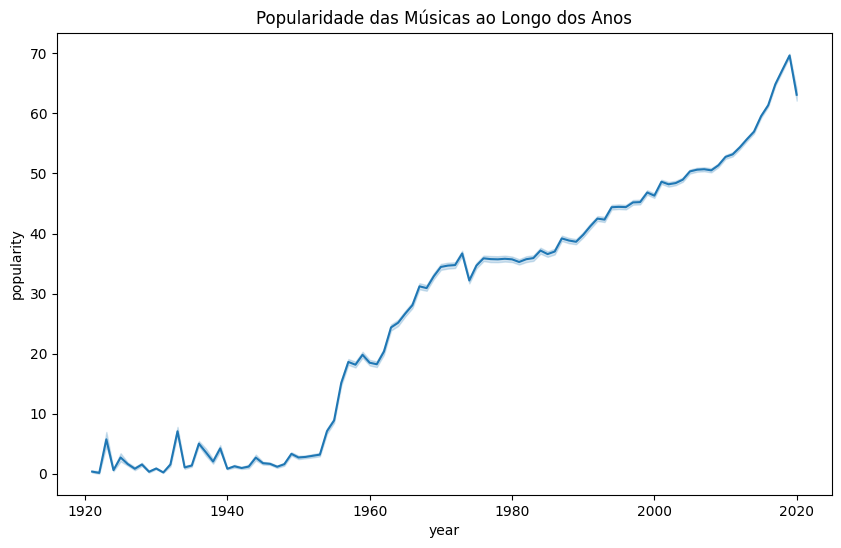

In [18]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data_df, x='year', y='popularity')
plt.title('Popularidade das Músicas ao Longo dos Anos')
plt.show()

# Visualização dos picos de diferentes formatos de mídia

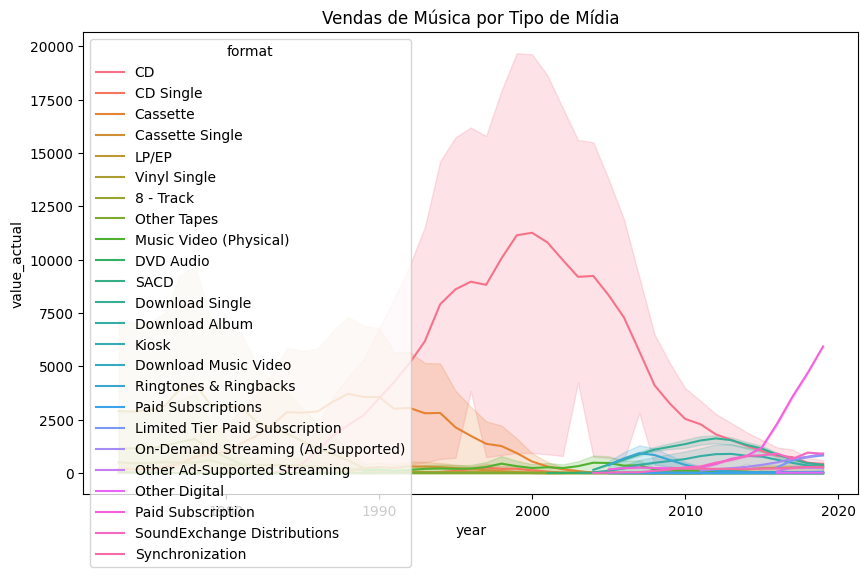

In [19]:
plt.figure(figsize=(10,6))
sns.lineplot(data=musicdata_df, x='year', y='value_actual', hue='format')
plt.title('Vendas de Música por Tipo de Mídia')
plt.show()

# Visualização dos rankings do Billboard Hot 100

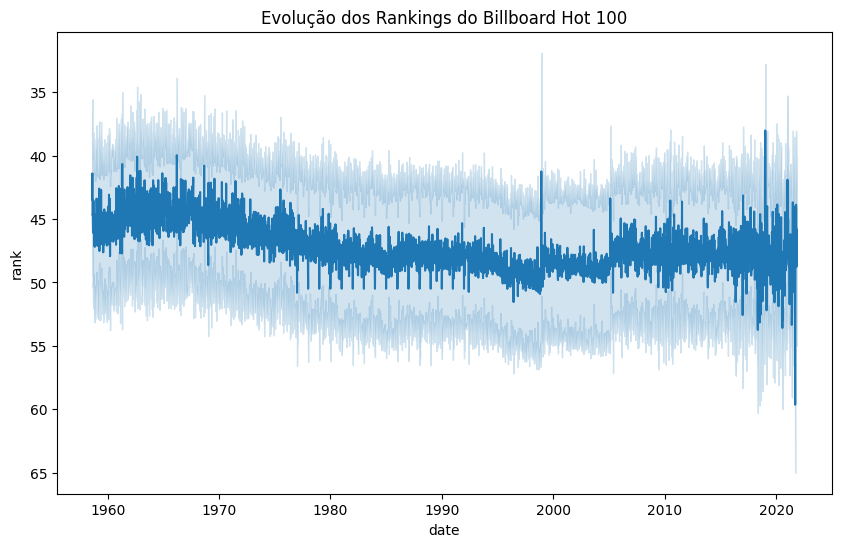

In [13]:
plt.figure(figsize=(10,6))
sns.lineplot(data=charts_df, x='date', y='rank')
plt.gca().invert_yaxis()  # Inverte o eixo Y para que o ranking 1 esteja no topo
plt.title('Evolução dos Rankings do Billboard Hot 100')
plt.show()